# Lending Club (Project)

# 1.Problem Statement

# Financial institutions need to decide whether a loan applicant is likely to repay a loan or Default.

# Making poor decisions can result in:
# A) Financial losses
# B) Increased loan defaults
# C) risk management

# 2.Goal

# The main goal is to analyze loan data and find patterns that help identify:
# A) Who repays loans successfully
# B) Who is more likely to default
# This will help in making better loan approval decisions in the future

# 3.Objectives

# Analyze loan status (Fully Paid vs Charged Off)
# Understanding factors like:
# A) Loan term
# B) Home ownership
# C) Other customer details affect loan repayment
# D) To clean the data by removing irrelevant, unusable columns and values
# E) By performing univariate and bivariate analysis using visualizations
# From the above factors we can predict which applicants are likely to default so the company can avoid lending to them and minimize the credit loss.¶

# 4.Understanding the Data

# This dataset contains information about previous loan applicants and their "Charged Off" status. The goal is to identify patterns indicating the likelihood of default, which can inform decisions such as loan denial, reducing loan amounts, or offering loans to risky applicants at higher interest rates.

# 5.Benefits

# A) Helps banks and financial companies reduce risk
# B) Improves loan approval accuracy
# C) Identifies high-risk customers early
# D) Helps in setting better interest rates and loan policies
# E) Supports data-driven decision making

# 6) lets Start the Project 


# We are going to do this project in four steps
# 1) Data Understanding (total column rows,tail,head,value dtype)
# 2) Data Cleaning (We will remove blank/unsuable columns,rows datas from the file)
# 3) Data Analysis (We are going to make Visualisation Graphs With the help of Matplotlib and Seaborn)
# 4) Recommendation (from the above 3 steps we will provide you the final answer about the project)

# Importing the Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
data=pd.read_csv("loan_csv.csv")

C:\Users\shaan\AppData\Local\Temp\ipykernel_3292\2798993295.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("loan_csv.csv")


# 1.Data Understanding

In [3]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# by checking data.head and data.tail will help check the structure and columns of dataset. 

In [5]:
data.shape

(39717, 111)

In [6]:
data.shape[0]

39717

In [7]:
data.shape[1]

111

# From data.shape we can see the total columns and rows of dataset shape[0] is for rows and shape[1] is for columns and we have analyzed that there are total of 39717 rows and 111 columns

In [8]:
data.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

# from the data.info we can see total columns value and dtypes and there so many unsuable columns and rows that we will remove and we also need to change the int_rate and emp_length dtypes and also the data has many columns that is why i have used verbose and show count so we can see and understand the data properly without verbose and show counts it will be difficult to understand

In [9]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# but from this there are many columns which have NaN or 0 values but cannot be seen from this analysis 

# So lets check the columns for any null values

In [10]:
data.isnull()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39713,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39714,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39715,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


# From the above analysis we can see that there are some columns which have null value.True means null value and False means there are values in the columns and from this we didn't get each columns value so we need to check each columns for that.

In [11]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
39712    False
39713    False
39714    False
39715    False
39716    False
Length: 39717, dtype: bool

In [12]:
data.duplicated().count()

np.int64(39717)

# from the above analysis we can see that there are no duplicated columns.If there are duplicated columns then we have to remove it.

# Now we can start the data cleaning but Before we start Data Cleaning we need to see that there are some column which are more important for this loan / lending club data Which are:
# A) loan amount
# B) term
# C) interest rate
# D) Grade
# E) Sub Grade
# F) Annual income
# G) Purpose
# H) Loan Status
# The Main Target is loan status beacuse it is the only column which tells us how the loan is fully paid, charged off, or currently going.

# 2.Data Cleaning

# Now according to the above analysis there many columns with large amount of missing values.First we are going to fix that

In [13]:
data.isnull().sum().reset_index()

,index,0
0,id,0
1,member_id,0
2,loan_amnt,0
3,funded_amnt,0
4,funded_amnt_inv,0
...,...,...
106,tax_liens,39
107,tot_hi_cred_lim,39717
108,total_bal_ex_mort,39717
109,total_bc_limit,39717


In [14]:
round(data.isnull().sum()/len(data.index), 2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

# from the above formula we can see that there some columns with 100% missing data but there will be some columns with 50% missing data but not sure

In [15]:
missing_col = data.columns[100*(data.isnull().sum()/len(data.index)) > 70] # removing the columns having more than 70% missing values
print(missing_col)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

# now we are going to remove this columns 

In [16]:
data=data.drop(missing_col,axis=1)
print(data.shape)

(39717, 55)


# as from the above formula some columns have been removed completely  

In [17]:
100*(data.isnull().sum()/len(data.index)) # summarising the data again

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          33.114284
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


# now while summarising the data again we see that some columns have 33% and 64% of approx missing data so we will check if it is valuable or not

In [18]:
data.loc[:, ['desc', 'mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgrade...,NaN
1,Borrower added on 12/22/11 > I plan to use thi...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


# both of the columns are un-usable so lets drop them

In [19]:
data=data.drop(['desc', 'mths_since_last_delinq'], axis=1)

# both the columns have been dropped

In [20]:
100*(data.isnull().sum()/len(data.index))

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

# there still some columns with missing values but lets not check columns but rows beacuse there are slightly chances of rows which have large missing values

In [21]:
data.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

# now we can see that there maximum 5 missing values in a row according to this formula but lets check if there are more than 5

In [22]:
len(data[data.isnull().sum(axis=1) > 5].index)

0

# we have checked that the data is not missing not more that 5 so lets just keep it the way as it is and from the this the data looks clean 

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

# as we can see that the columns have dropped from 110 to 52 and there will be more need to check the column if it is necessary for us or not and also lets change the dtypes of int_rate and emp_length 

In [24]:
data['int_rate'] = data['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [25]:
data['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

# The Percent Symbol has been Removed.

In [26]:
data['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

# Need to remove the attributes for analysis

In [27]:
# first, let's drop the missing values from the column (otherwise the regex code below throws error)
data=data[~data['emp_length'].isnull()]
# using regular expression to extract numeric values from the string
data['emp_length']=data['emp_length'].apply(lambda x:re.findall('\d+', str(x))[0])
# convert to numeric
data['emp_length']=data['emp_length'].apply(lambda x:pd.to_numeric(x))

In [28]:
data['emp_length'].value_counts()

emp_length
10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
Name: count, dtype: int64

# Now the data is Usable 

In [29]:
behaviour_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]
behaviour_var

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

# This columns needs to removed beacuse this is not the part for our analysis so we will drop this columns

In [30]:
df = data.drop(behaviour_var, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  38642 no

# Now there are 4 columns which are of no use to us which are title,url,zip_code,addr_state 

In [31]:
# also, we will not be able to use the variables zip code, address, state etc.
# the variable 'title' is derived from the variable 'purpose'
# thus let get rid of all these variables as well
df = df.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38642 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  int64  
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  38642 no

# now the total usable columns are 27 out of 110

# Next, let's have a look at the target variable - loan_status

In [33]:
# let name of the fully  paid (0) and charged off (1).
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

loan_status
Fully Paid     32145
Charged Off     5399
Current         1098
Name: count, dtype: int64

# According to the loan status columns given in the dataset there are 32145 of fully paid ,5399 of Charged Off ,1098 of current the Majority of the loans are fully paid 

In [34]:
# filtering only fully paid or charged-off
df = df[df['loan_status'] != 'Current']
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
# converting loan_status to integer type
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))
# summarising the values
df['loan_status'].value_counts()

loan_status
0    32145
1     5399
Name: count, dtype: int64

# Now We can start Data Analysis 

# 3.Data Analysis 

# We will Divide Analysis into two parts UNIVARIATE ANALYSIS and BIVARIATE ANALYSIS 

# A) UNIVARIATE ANALYSIS

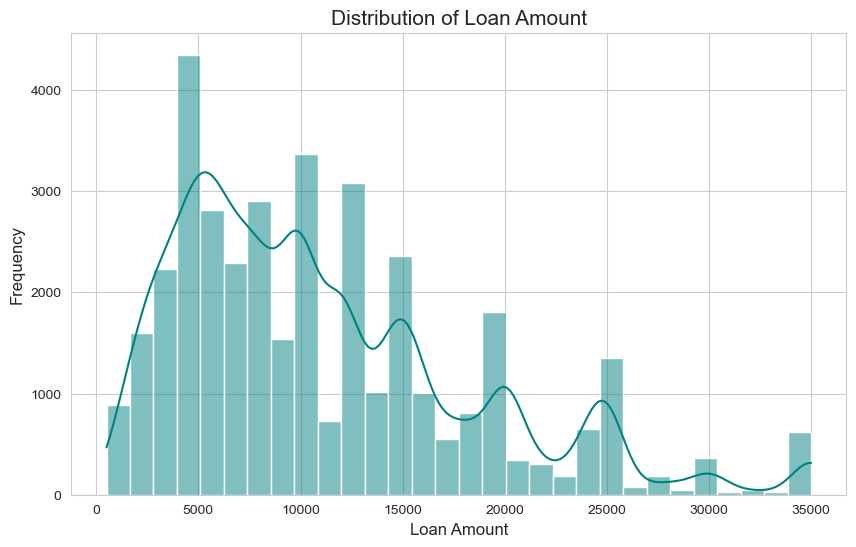

In [35]:
# Distribution of Loan Amount
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.histplot(df['loan_amnt'], bins=30, kde=True, color='teal')
plt.title('Distribution of Loan Amount', fontsize=15)
plt.xlabel('Loan Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# We can see that most loans are concentrated in the 5000 to 15000 range with a significant rise and from 20000 there are some spikes but not like 5000 to 15000

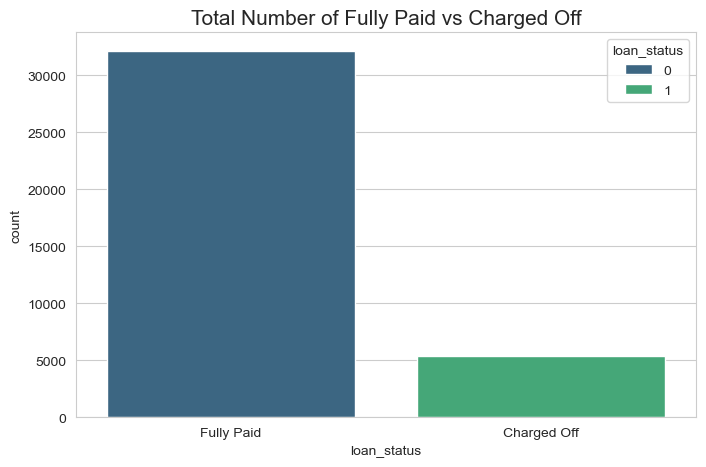

In [36]:
# Total Number of Fully Paid vs Charged Off
plt.figure(figsize=(8, 5))
sns.countplot(x='loan_status', data=df, hue='loan_status', palette='viridis')
plt.title('Total Number of Fully Paid vs Charged Off', fontsize=15)
plt.xticks([0, 1], ['Fully Paid', 'Charged Off'])
plt.show()

# As from the Above analysis We can see That Charged off loan are much Lower compared to the fully Paid loans so from that we can understand that the rate of default is less than fully paid

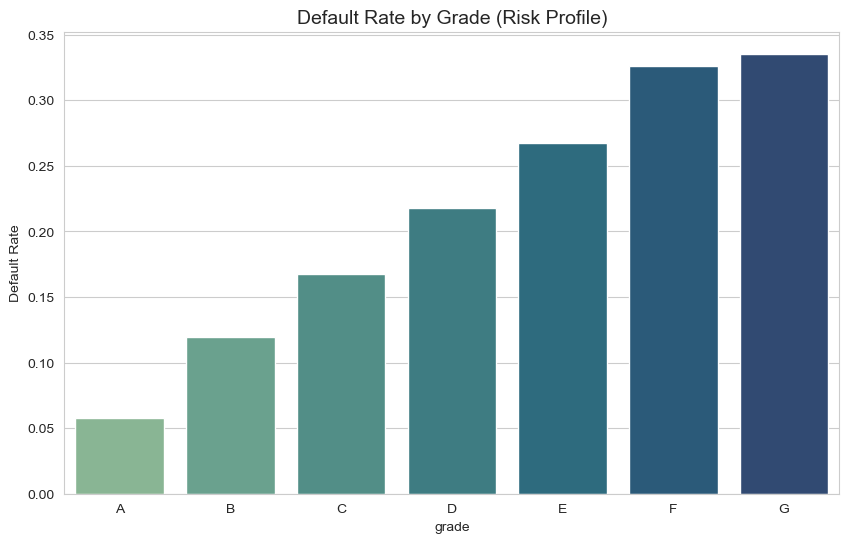

In [37]:
# Default Rate by Grade (Risk Profile)
grade_risk = df.groupby('grade')['loan_status'].mean()
grade_risk= grade_risk.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=grade_risk, x='grade', y='loan_status', hue='grade', palette='crest',legend=False)
plt.title('Default Rate by Grade (Risk Profile)', fontsize=14)
plt.ylabel('Default Rate')
plt.show()

# From this analysis we can see the Grade From A to G.
# A identify as the lowest risk and G identify as the highest risk

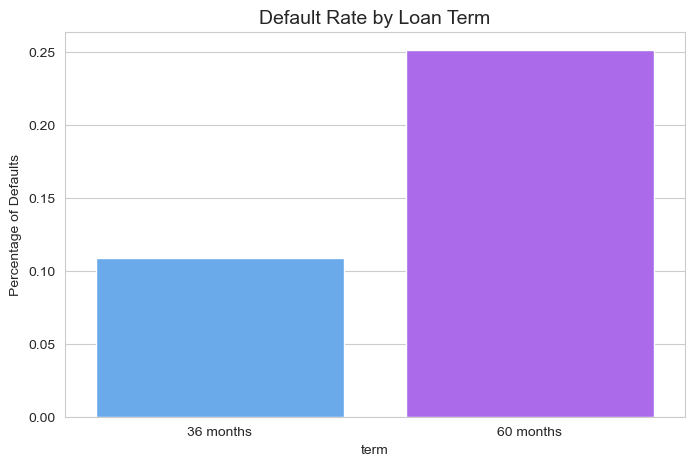

In [38]:
# Default Rate by Loan Term
term_risk = df.groupby('term')['loan_status'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='term', y='loan_status', hue='term', data=term_risk, palette='cool')
plt.title('Default Rate by Loan Term', fontsize=14)
plt.ylabel('Percentage of Defaults')
plt.show()

# From the Above analysis we can see that 60 months loan is more than 36 month loan and due to this it will be difficult for the borrower to repay the amount

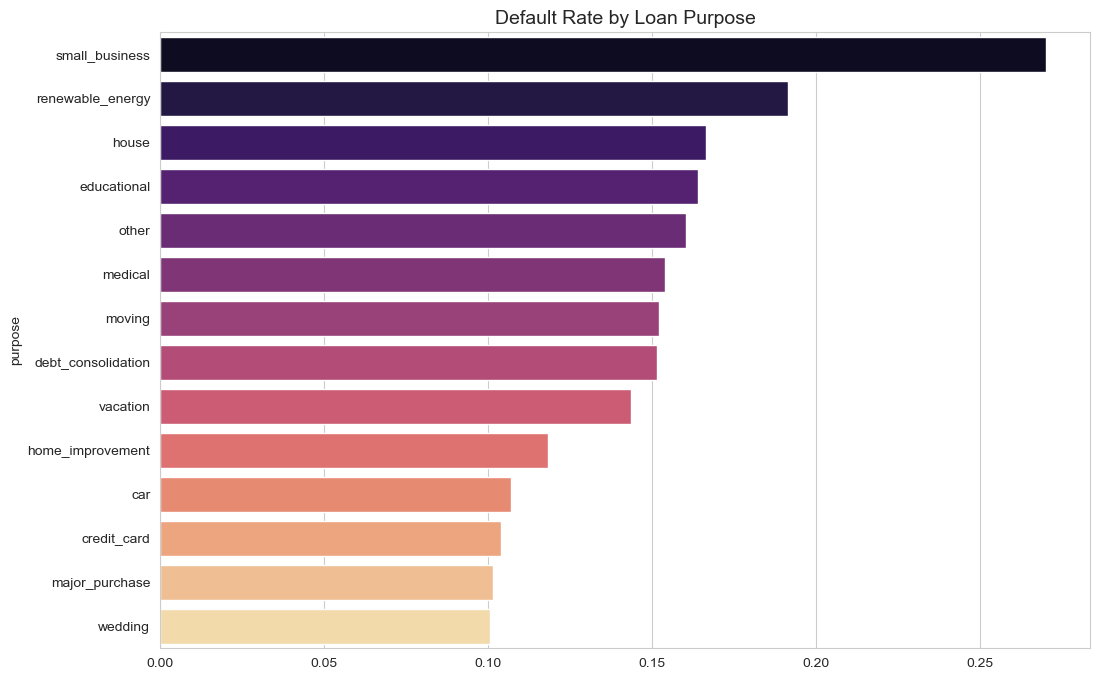

In [54]:
# Default Rate by Loan Purpose
plt.figure(figsize=(12, 8))
purpose_risk = df.groupby('purpose')['loan_status'].mean().sort_values(ascending=False)
sns.barplot(x=purpose_risk.values, y=purpose_risk.index, hue=purpose_risk.index, legend=False, palette='magma')
plt.title('Default Rate by Loan Purpose', fontsize=14)
plt.show()

# According to the dataset and from the above anlysis we see that small business have highest default rate than any other and wedding or major purchases have the safer loan compare to small business

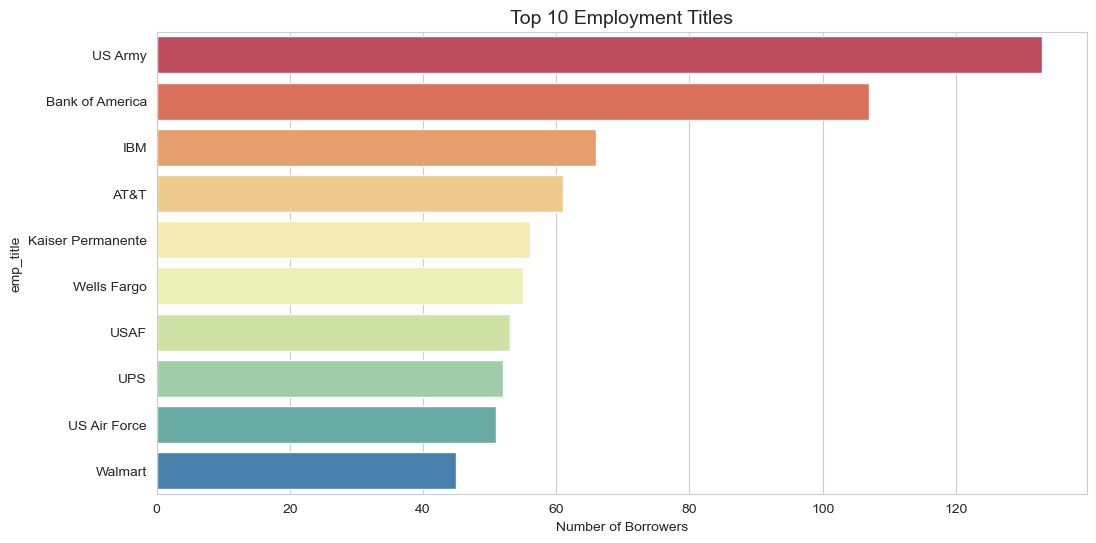

In [40]:
# Top 10 Employment Titles
plt.figure(figsize=(12, 6))
top_jobs=df['emp_title'].value_counts().head(10)
sns.barplot(x=top_jobs.values, y=top_jobs.index, hue=top_jobs.index, legend=False, palette='Spectral')
plt.title('Top 10 Employment Titles', fontsize=14)
plt.xlabel('Number of Borrowers')
plt.show()

# From the Above analysis we can see the top 10 employment title and US Army has the highest number of borrowers than any other titles and lowest is the walmart

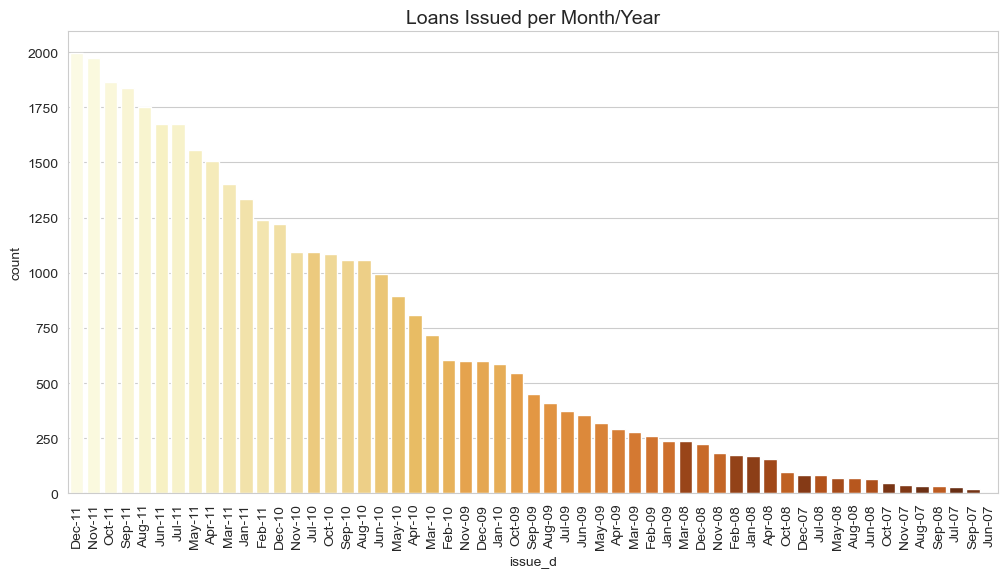

In [41]:
# Loans Issued per Month/Year
plt.figure(figsize=(12, 6))
sns.countplot(x='issue_d', data=df, palette='YlOrBr', hue='issue_d',legend=False, order=df['issue_d'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Loans Issued per Month/Year', fontsize=14)
plt.show()

# According to the dataset we see that December 2011 is maximum amount of loan has been given to borrowers count is around 2000.
# 2000 people were given loan at the december month of 2011

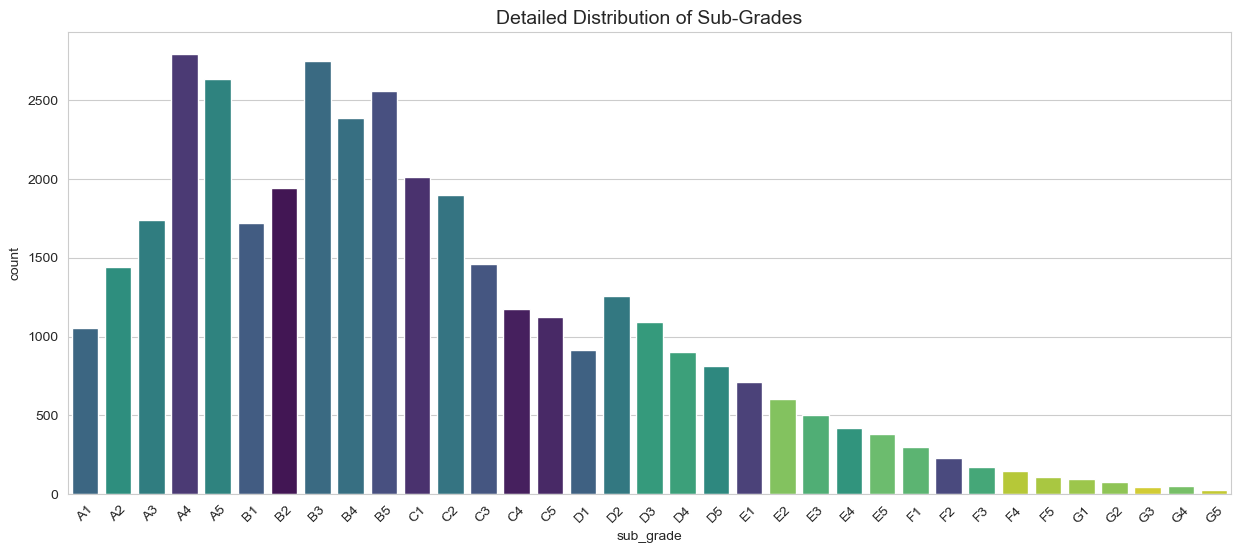

In [42]:
# Detailed Distribution of Sub-Grades
plt.figure(figsize=(15, 6))
sns.countplot(x='sub_grade', data=df, order=sorted(df['sub_grade'].unique()),hue='sub_grade', palette='viridis')
plt.title('Detailed Distribution of Sub-Grades', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# According to Graph we have already seen that A identify as lowest risk and G identify as Highest risk but the Sub-Grade will Provide in depth and from this we see that the G1 to 5 have the lowest count compared to A4 where A4 has the highest amount of loan Counts.

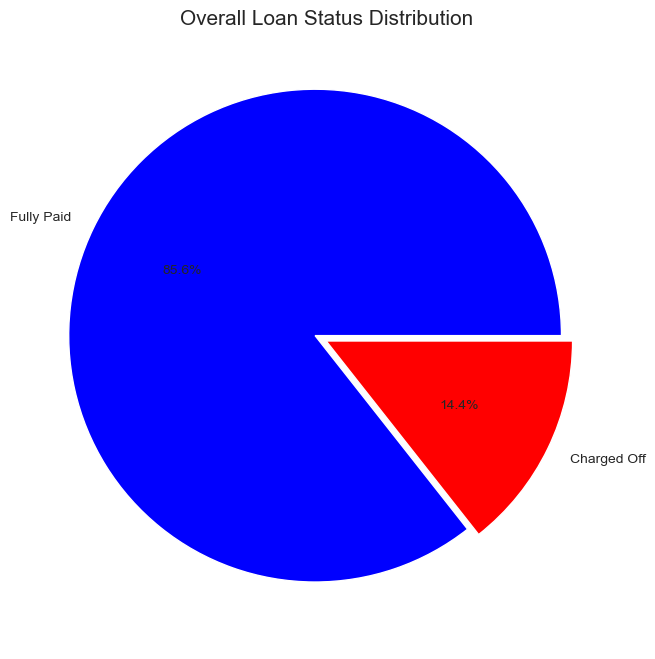

In [43]:
# Loan Status Distribution
plt.figure(figsize=(8, 8))
status_counts = df['loan_status'].value_counts()
plt.pie(status_counts, labels=['Fully Paid', 'Charged Off'], autopct='%1.1f%%', colors=['blue','red'],explode=(0.05, 0))
plt.title('Overall Loan Status Distribution', fontsize=15)
plt.show()

# According to the Above analysis we see the Distribution of loan 85.6% is fully Paid and 14.4% is Charged Off from this we can say that Fully paid is more than Charged off

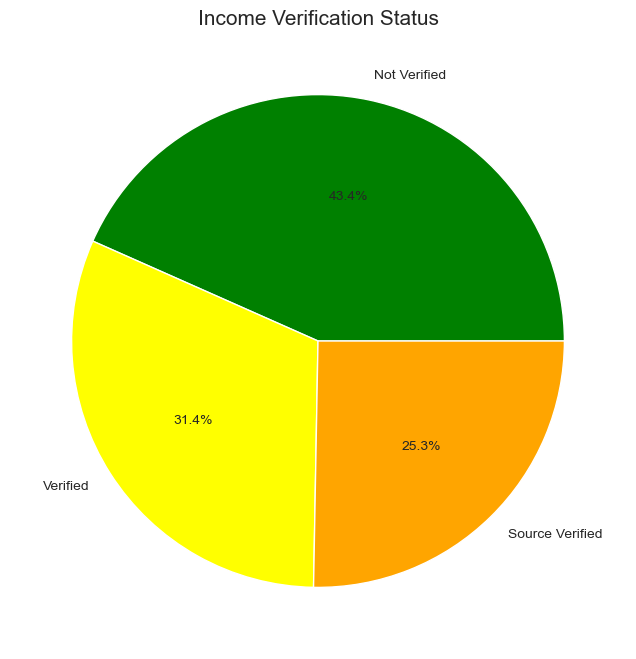

In [44]:
# Income Verification Status
plt.figure(figsize=(8, 8))
verify_counts=df['verification_status'].value_counts()
plt.pie(verify_counts, labels=verify_counts.index, autopct='%1.1f%%', colors=['green','yellow','orange'])
plt.title('Income Verification Status', fontsize=15)
plt.show()

# From this Graph we can see that the not verified source has the highest percentage which is actually not good for bank beacuse it will create more default

# SEGMENTED UNIVARIATE ANALYSIS

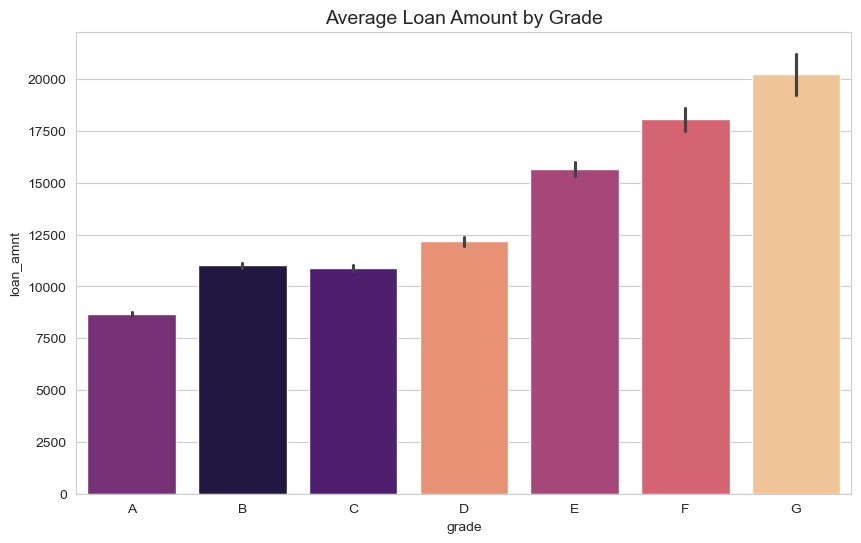

In [45]:
# Average Loan Amount by Grade
plt.figure(figsize=(10, 6))
sns.barplot(x='grade', y='loan_amnt', data=df, hue='grade', palette='magma', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.title('Average Loan Amount by Grade', fontsize=14)
plt.show()

# This Graph Shows the Average Amount the bank is willing to give each grade categories.
# Now We see that A has the Lowest loan amt and G has The highest Loan amt ar around 20000$

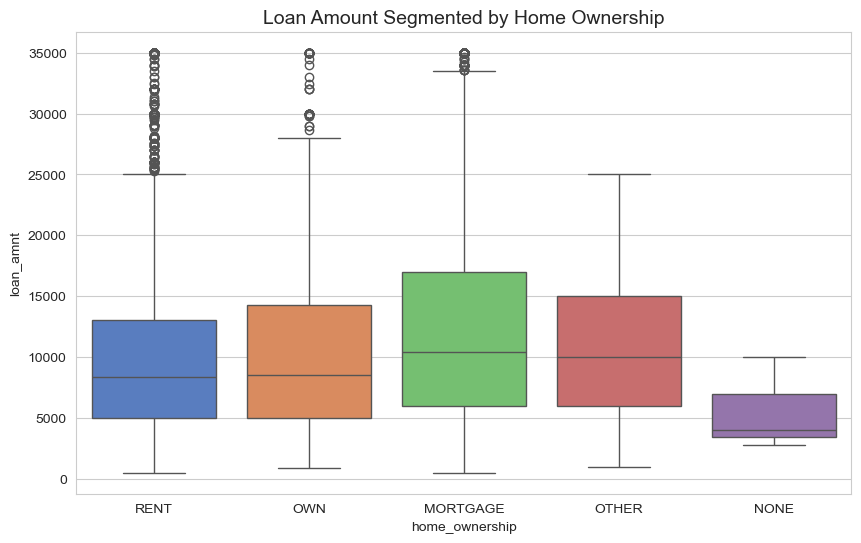

In [46]:
# Loan Amount by Home Ownership
plt.figure(figsize=(10, 6))
sns.boxplot(x='home_ownership', y='loan_amnt', hue='home_ownership', data=df, palette='muted')
plt.title('Loan Amount Segmented by Home Ownership', fontsize=14)
plt.show()

# From this analysis we can see that the borrower who live in rent have more loan  and also same about mortage home and own home but less compared to rent and other 2 are also there but less compared to this 3. 

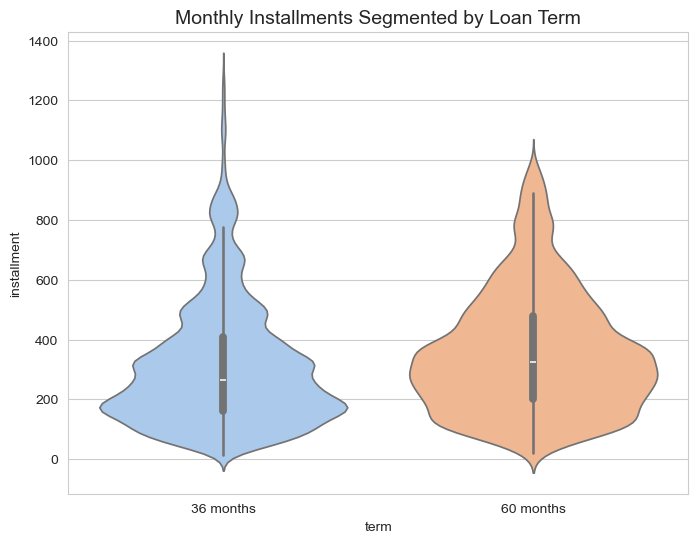

In [47]:
# Monthly Installments by Loan Term
plt.figure(figsize=(8, 6))
sns.violinplot(x='term', y='installment', hue='term', data=df, palette='pastel')
plt.title('Monthly Installments Segmented by Loan Term', fontsize=14)
plt.show()

# From this analysis we can see that the 36 months have higher monthly installment and 60 months loans tend to have lower monthly installments.

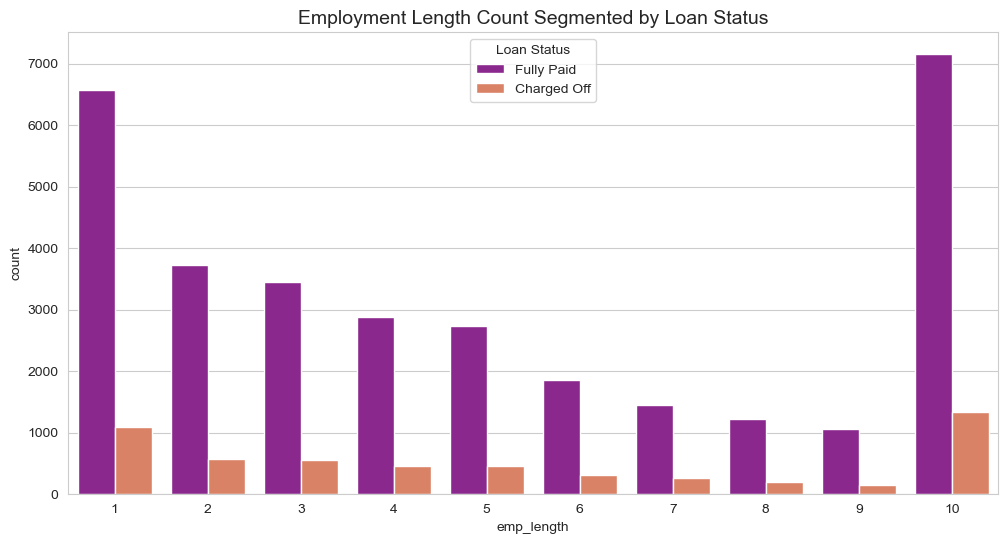

In [48]:
# Employment Length Count by Loan Status
plt.figure(figsize=(12, 6))
sns.countplot(x='emp_length', hue='loan_status', data=df, palette='plasma')
plt.title('Employment Length Count Segmented by Loan Status', fontsize=14)
plt.legend(title='Loan Status', labels=['Fully Paid', 'Charged Off'])
plt.show()

# From this Analysis we see that borrowers with longer employment length are more common in the dataset and 10 year emplyments shows the strongest repayment outcomes

# B) BIVARIATE ANALYSIS

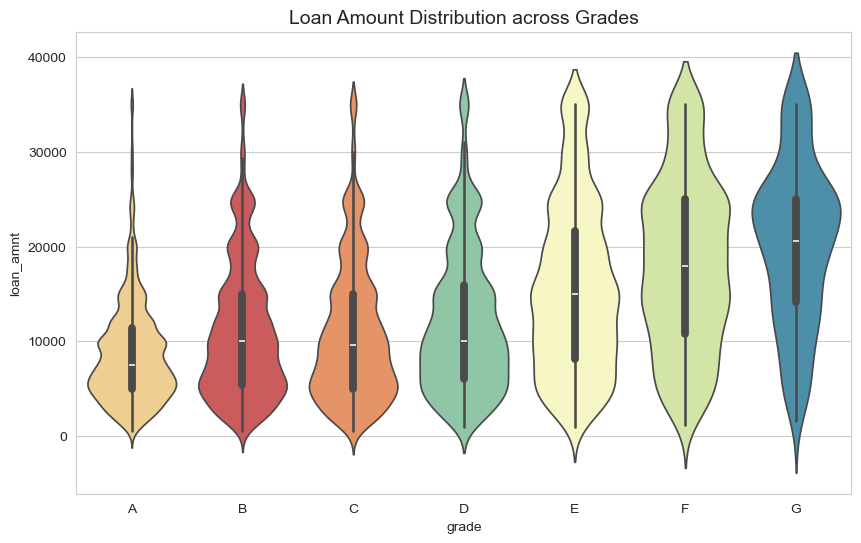

In [49]:
# Loan Amount Distribution across Grades
plt.figure(figsize=(10, 6))
sns.violinplot(x='grade', y='loan_amnt', hue='grade', data=df, order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], palette='Spectral')
plt.title('Loan Amount Distribution across Grades', fontsize=14)
plt.show()

# From this analysis we can see the Viloin plot shows the distribution of loan amounts according to the grade from A to G.
# From A to C grades tend to have lower loan amounts and from D to G loan amounts generally increase and it spread widely. 

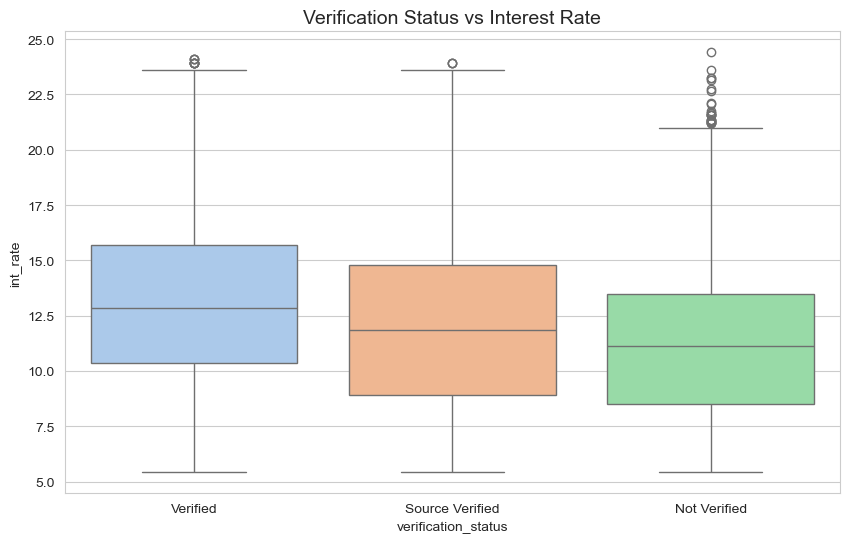

In [50]:
# Verification Status vs Interest Rate
plt.figure(figsize=(10, 6))
sns.boxplot(x='verification_status', y='int_rate', hue='verification_status', data=df, palette='pastel')
plt.title('Verification Status vs Interest Rate', fontsize=14)
plt.show()

# From this analysiswe see that verified loans have higher interest as well which is very strange and also not verified as well from this point we can assume that bank is checking borrowers who have high-risk or large amount of loans

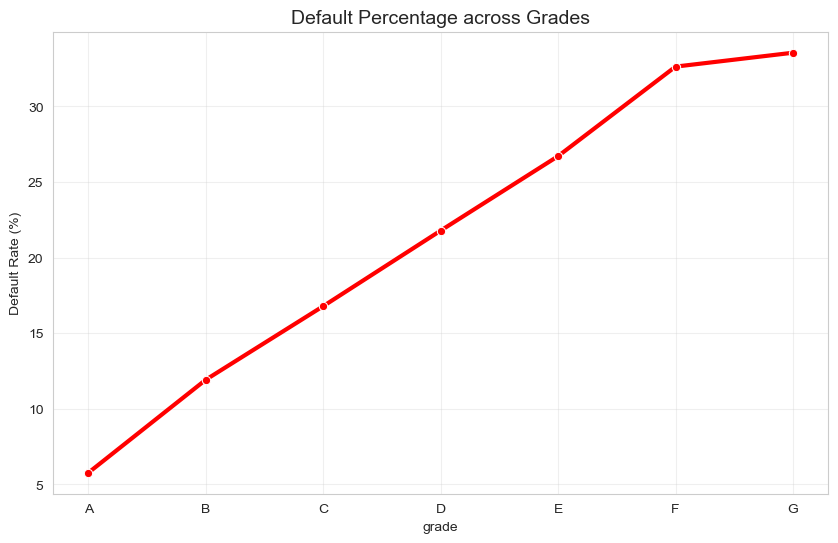

In [51]:
# Default Percentage across Grades
grade_default = df.groupby('grade')['loan_status'].mean() * 100
plt.figure(figsize=(10, 6))
sns.lineplot(x=grade_default.index, y=grade_default.values, marker='o', color='red', linewidth=3)
plt.title('Default Percentage across Grades', fontsize=14)
plt.ylabel('Default Rate (%)')
plt.grid(True, alpha=0.3)
plt.show()

# From this Analysis we see that the default rate according to grade the Line continuously increase from Grade A to G which is actually the bad sign it will be difficult for bank to recollect the amounts from the borrowers 

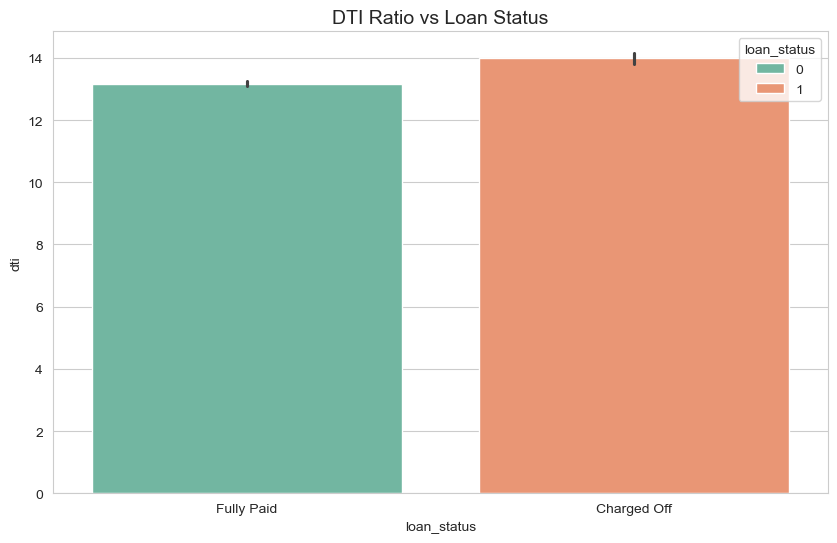

In [52]:
# DTI Ratio vs Loan Status
plt.figure(figsize=(10, 6))
sns.barplot(x='loan_status', y='dti', hue='loan_status', data=df, palette='Set2')
plt.title('DTI Ratio vs Loan Status', fontsize=14)
plt.xticks([0, 1], ['Fully Paid', 'Charged Off'])
plt.show()

# From this Analysis we can see that the charged off tends to have a higher loans compared to fully paid which means that the borrowers are the likely default

# Conclusion

# The analysis looked at thousands of past loans to see who paid them back and who didn't.

# A) About 85% of borrowers fully paid their loans, while roughly 15% defaulted (failed to pay).

# B) Lending Club Grading system is very strong.As the grade Moves From A (Lowest Risk) to G (Highest Risk) the percentage of "Charged Off" loans increases significantly.Grade G Loans show the highest risk of default

# C) There is a clear pattern where borrowers with higher DTI ratios (meaning they have high monthly debt compared to income) tend to default more frequently.

# D) "Verified" loans actually show a slightly higher default rate than "Not Verified" loans in this specific dataset. This suggests that the verification process used at that time might have been focused on larger, potentially riskier loans.

# E) Borrowers who take out loans specifically for starting or running a small business show a higher risk compared to other categories like home improvement.

# F) Loans meant to be paid back over 60 months are roughly twice as risky as those with a 36-month term.

# 4.Recommendations

# A) The company should avoid approving loans for applicants whose monthly debt payments are already high compared to their income (High DTI).

# B) For applicants in grades E, F, or G, the company should consider either denying the loan or strictly limiting the amount they can borrow.

# C) Since 60-month loans fail much more often, the lender should push for 36-month terms or charge a much higher "risk premium" (interest rate) for longer loans.

# D) Because small business loans are higher risk, the company should require more proof of stability or a higher credit score for this specific group.

# E) The company should investigate why "Verified" loans are defaulting at a higher rate and refine the verification process to better catch potential borrowers in high-value loan applications.

# F) Focus on applicants with stable income and lower debt-to-income ratios to ensure a higher percentage of "Fully Paid" loans.